<a href="https://colab.research.google.com/github/sanjay1618/-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/main/2_Hands_on_MachineLearning_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Extracting the dataset and loading into the hosuing variable
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()


In [2]:
print(housing.head(n=10))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0   

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Observations of the dataset
# Total number of rows are 20650 and in the total_bedrooms column non null values are 20433 which means there are some null values.
# Also the ocean_proximity columm type is object and if you observe the column values they are categorical.

In [5]:
#Splitting the dataset into test_set and train_set using the numpy and random numbers
import numpy as np
def shuffle_and_split_data(dataset,test_size_ratio):
  shuffled_indices=np.random.permutation(len(dataset))
  test_set_size=int(len(dataset) * test_size_ratio)
  test_set=dataset.iloc[:test_set_size]
  train_set=dataset.iloc[test_set_size:]
  return [test_set, train_set]

#test_set, train_set = shuffle_and_split_data(housing, 0.2)

In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state= 42)
print(train_set.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.22     32.75                34.0       6001.0          1111.0   
8267     -117.03     32.69                10.0        901.0           163.0   
17445    -122.27     37.74                28.0       6909.0          1554.0   
14265    -121.82     37.25                25.0       4021.0           634.0   
2271     -115.98     33.32                 8.0        240.0            46.0   

       population  households  median_income  median_house_value  \
14196      2654.0      1072.0         4.5878            291000.0   
8267        698.0       167.0         4.6648            156100.0   
17445      2974.0      1484.0         3.6875            353900.0   
14265      2178.0       650.0         5.1663            241200.0   
2271         63.0        24.0         1.4688             53800.0   

      ocean_proximity  
14196      NEAR OCEAN  
8267       NEAR OCEAN  
17445        NEAR BAY  
14265       <1H OCEA

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')


<Axes: xlabel='income_cat', ylabel='count'>

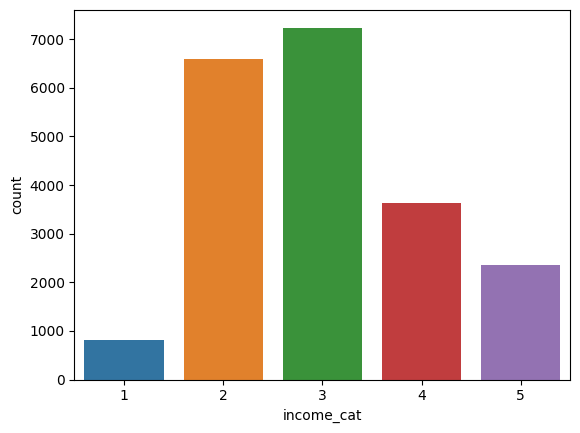

In [7]:
# Creating a new column by splitting the columns into different intervals or categoreis for a continuous column by using the pd.cut()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Adding a new column named income_cat to the housing dataframe by using cut which categorizes the values into bins
housing['income_cat'] = pd.cut(housing['median_income'], bins = [0, 1.5, 3.0, 4.5, 6.0, np.inf], labels = [1, 2, 3, 4, 5])
# above categories are 0 - 1.49999 -- 1 , 1.5 - 2.999999 -- 2 ....

print(housing.columns)
housing.loc[:,['income_cat']]

histogram, axes = plt.subplots()
sns.countplot(data=housing, x='income_cat', ax=axes)



In [8]:
# We are gonna use the StratifiedShuffleSplit to preserve the class distribution.
# This is used in situations where we have a classifcation problem with imbalanced class distribution.
#This module is particularly useful for creating train/test splits of your dataset while ensuring that the class distribution is preserved in both the training and testing sets.

from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)
strat_splits = []

# The splitter object only returns the indices but not rows. So, we need to create dataframes and storing it in a list for further accessing.
# The split method, creates a generator and we can use that to get indices
for train_index, test_index in splitter.split(housing, housing['income_cat']):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]
    strat_splits.append([strat_train_set, strat_test_set])
strat_train_1, strat_test_1 = strat_splits[0]


In [9]:
# We can check the percentages of each class or category in the income_cat column to see the distributions
print(strat_test_1['income_cat'].value_counts() / len(strat_test_1))

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64


In [10]:
# Dropping the income_cat column from the both the strat_train_1 and strat_test_1 dataframes.
#for df in (strat_train_1, strat_test_1):
    #df.drop("income_cat", axis = 1, inplace = True)

# Creating a copy of the strat_train_1 in the housing_copy
housing_strat_copy = strat_train_1.copy()

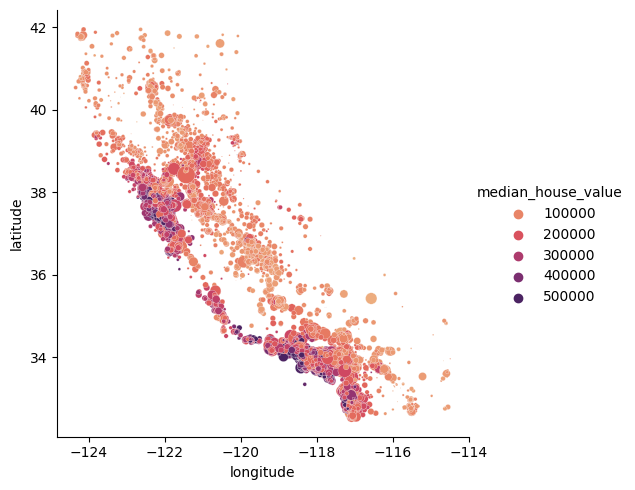

In [11]:
# Since the dataset is having lattitues and longitudes, we can create a scatterplot to visualize the districts

sns.relplot(data = strat_train_1, kind = "scatter", x = "longitude", y = "latitude", s = strat_train_1['population'] / 100, hue = "median_house_value", palette = "flare")




In [12]:
# Creating the co-relation matrix( or commonly called pearson's r) to see any co-realtion among the attribues
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = True)


# If you see there is a strong corelation between median_house_value and the median_income

<ipython-input-12-371a93c39ab8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

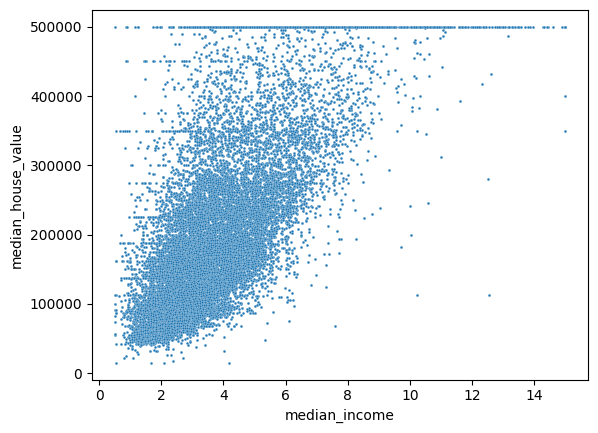

In [13]:
# We see that there is a positive correlation between Median house value and median income. Let us plot a scatterplot for the both columns.
scatter_i_h, axes = plt.subplots()
sns.scatterplot(data = strat_train_1, x = "median_income", y = "median_house_value", s = 4, ax = axes)

In [14]:
housing = strat_train_1.drop("median_house_value", axis = 1)
housing_labels = strat_train_1["median_house_value"].copy()

#Cleaning the data to handle the missing values using the normal way and from the Sklearn
# 1 Get rid of the corresponding districts.
# 2 Get rid of the whole attribute.
# 3 Set the missing values to some value (zero, the mean, the median, etc.). This is called imputation.

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

# Since median can only be calculated on the numerical attributes, we need to create a copy of all the attributes except object types.
housing_numerical = housing.select_dtypes(include = [np.number])
# using the fit() to the training data to calculate the median values and it is stored in the imputer.statistics_ attribute
imputer.fit(housing_numerical)
# So now we calcualted the median values of all the attributes(remeber we created a new df for the numerical attributes)
imputer.statistics_
# Now transforming or modifying the housing_numerical dataframe to fillin the median values for the missing values.
#Remember the transform method returns a numpy array or scikit sparse matrix. We need to convert the array to Dataframe in later step.

X = imputer.transform(housing_numerical)
housing_transformed = pd.DataFrame(X, columns = housing_numerical.columns, index = housing_numerical.index)
print(housing_transformed.info())
#You can see that all the missing values are handles by replacing them with the median value using the SimpleImputer class .

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.6 MB
None


In [15]:
# We all know that ML algorithms works very well with the numericals rather than categorical variables. So, we need to encode the variables
# One of the class is OrdinalEncoder ( Which is best for if the values of a column are in a ordinal relationship i.e in an increasing order or hierarchical order)
# High School , Undergrad, Grad, Phd , post doc etc... these are getting advanced from one to another...also... bad avg good vgood excellent..
from sklearn.preprocessing import OrdinalEncoder
housing_cat = housing[['ocean_proximity']]
encoder = OrdinalEncoder()
encoder.fit_transform(housing_cat)
# But the problem with this encoding is that they are not in a ordinal relationship and ML tend to consider that close values are similar .
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [16]:
# We will use the one-hot encoding method to encode our categorical attribute.
# One-hot encoding converts each category into a binary vector of zeros and ones. Each category is transformed into a new binary feature,
# and only one of these binary features is "hot" (set to 1) for a given data point indicating the category's presence.
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat)

# The return type of the one_hot encoder is the sciPy sparse matrix because only one of them encoded as hot i.e 1 and the rest as 0's.

In [17]:
# Scaling the values and normalizing them to keep them in a specific range so that larger values doesn't dominate the lower values.
# One type of scaling is MinMax Scaling which scales the values to the range [0,1].
# We can also select a different range but [0,1] is the default value  and the formula is x-min / max -min
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler(feature_range= (-1,1))
housing_numerical_min_max_scaled = minmax_scaler.fit_transform(housing_numerical)
print(pd.DataFrame(housing_numerical_min_max_scaled, columns = housing_numerical.columns, index = housing_numerical.index).head())


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096  -0.608519  0.117021            1.000000    -0.831171       -0.641166   
14973   0.210953 -0.661702            0.529412    -0.900148       -0.886294   
3785   -0.519270  0.236170            0.254902    -0.945012       -0.930424   
14689   0.468560 -0.744681           -0.372549    -0.787782       -0.726204   
20507   0.257606 -0.740426            0.372549    -0.778015       -0.610243   

       population  households  median_income  
13096   -0.807018   -0.614336      -0.779479  
14973   -0.918660   -0.867090      -0.229293  
3785    -0.931419   -0.924585      -0.733369  
14689   -0.774015   -0.709166      -0.756983  
20507   -0.765796   -0.562815      -0.582171  


<Axes: xlabel='housing_median_age', ylabel='Count'>

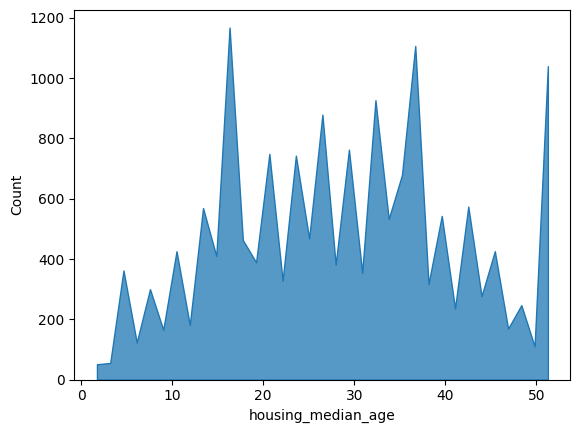

In [18]:
hist, axes = plt.subplots()
sns.histplot(data = housing_numerical, x = 'housing_median_age', element = "poly", ax = axes)

In [19]:
print(housing_labels.head(n=7))

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
1286      92600.0
18078    349300.0
Name: median_house_value, dtype: float64


In [20]:
# We are using LinearRegression class to predict the value.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())
model = LinearRegression()
model.fit(housing[['median_income']], scaled_labels)
some_new_data = housing[['median_income']].iloc[:5]
scaled_prediction = model.predict(some_new_data)
# We are using the .inverse_transform() to get back to the normal value.
prediction = target_scaler.inverse_transform(scaled_prediction)
print(prediction)

[[131997.15275877]
 [299359.35844434]
 [146023.37185694]
 [138840.33653057]
 [192016.61557639]]


In [21]:
# Applying a custom function or in-built functions to all the data points using the FunctionTransformer
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func = np.exp)
log_pop = log_transformer.transform(housing[['population']])

In [22]:
from IPython.core.interactiveshell import dis
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy = "median"), StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [30]:
# Calling .fit() method on the pipeline applies fit_transform() to the transformers except the last one.
housing_num_prepared = num_pipeline.fit_transform(housing_numerical)
#print(housing_num_prepared.round(2))
# As we all know that transformers return the array or sparse matrix so we need to convert that array or sparse matrix into dataframe.
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns = num_pipeline.get_feature_names_out(), index = housing_numerical.index)
print(df_housing_num_prepared.head(n=2))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096  -1.423037  1.013606            1.861119     0.311912        1.368167   
14973   0.596394 -0.702103            0.907630    -0.308620       -0.435925   

       population  households  median_income  
13096    0.137460    1.394812      -0.936491  
14973   -0.693771   -0.373485       1.171942  


In [42]:
# So far we have applied the transformations to only numerical attributes. So now we will use ColumnTransformer class to make pipelines for both numerical columns and categorical columns
num_attributes = housing.select_dtypes(include = ["number"]).columns.tolist()
cat_attributes = housing.select_dtypes(include = ["category"]).columns.tolist()

from sklearn.compose import ColumnTransformer

cat_pipeline = make_pipeline(SimpleImputer(strategy = "most_frequent"), OneHotEncoder(handle_unknown = "ignore"))
# num_pipeline = make_pipeline(SimpleImputer(strategy = "median"), StandardScaler()) this is the numerical pipeline that we defined earlier.

preprocessing = ColumnTransformer([("num", num_pipeline, num_attributes), ("col", cat_pipeline, cat_attributes)])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('col',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['income_cat'])])